# Random Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Ensemble Averages

Ensemble averages characterize the average properties of a random process across the population of all possible sample functions in the ensemble. We distinguish between first- and higher-order ensemble averages. The former consider the average properties of the sample functions of one random process for one particular time-instant $k$, while the latter take more than one random process at different time-instants into account.

### First-Order Ensemble Averages

#### Definition

The first-order ensemble average of a continuous-amplitude real-valued random signal $x[k]$ is defined as

\begin{equation}
E\{ f(x[k]) \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k])
\end{equation}

where $E\{ \cdot \}$ denotes the expectation operator, $x_n[k]$ the $n$-th sample function and $f(\cdot)$ an arbitrary mapping function. It is evident from the definition that the ensemble average can only be given exactly for random processes where the internal structure is known. For practical random processes, like e.g. speech, the ensemble average can only be approximated by a finite but sufficiently large number $N$ of sample functions.

The ensemble average can also be given in terms of the univariate probability density function (PDF)

\begin{equation}
E\{ f(x[k]) \} = \int\limits_{-\infty}^{\infty} f(\theta) \, p_x(\theta, k) \, \mathrm{d}\theta
\end{equation}

#### Properties

The following properties can be concluded from the definition of the ensemble average:

1. The ensemble averages for two different time-instants $k_1$ and $k_2$ differ in general

    \begin{equation}
    E\{ f(x[k_1]) \} \neq E\{ f(x[k_2]) \}
    \end{equation}
    
2. For a linear mapping $f(x[k]) = C \cdot x[k]$ with $C \in \mathbb{R} \setminus \{0\}$, the ensemble average is a linear operation
    
    \begin{equation}
    E\{ A \cdot x[k] + B \cdot y[k] \} = A \cdot E\{ x[k] \} + B \cdot E\{ y[k] \}
    \end{equation}

3. For a deterministic signal $x_n[k] = s[k]$ $\forall n$ the ensemble average is 

    \begin{equation}
    E\{ f(s[k]) \} = f(s[k])
    \end{equation}

The choice of the mapping function $f(\cdot)$ determines the particular property of the random process which is characterized by the ensemble average. Common choices are discussed in the following.

#### Linear mean

The linear [mean](https://en.wikipedia.org/wiki/Mean), which is given for $f(x[k]) = x[k]$, is the arithmetic mean value across all sample functions $x_n[k]$ for a given time instant $k$. 

Introducing $f(x[k]) = x[k]$ into the definition of the ensemble average yields

\begin{equation}
\mu_x[k] = E\{ x[k] \} = \int\limits_{-\infty}^{\infty} \theta \, p_x(\theta, k) \, \mathrm{d}\theta
\end{equation}

where $\mu_x[k]$ commonly denotes the linear mean. A process with $\mu_x[k] = 0$ is termed as *zero-mean* or *mean-free*. Note that $\mu_x$ should not be confused with the discrete frequency index of the DFT.

#### Quadratic mean

The quadratic mean is given for $f(x[k]) = x^2[k]$

\begin{equation}
E\{ x^2[k] \} = \int\limits_{-\infty}^{\infty} \theta^2 \, p_x(\theta, k) \, \mathrm{d}\theta
\end{equation}

It quantifies the average instantaneous power of a sample function for a given time index $k$.

#### Variance

The [variance](https://en.wikipedia.org/wiki/Variance) is defined as the quadratic mean of a zero-mean random process. For a general random process with linear mean $\mu_x$ it is given as

\begin{equation}
\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \}
\end{equation}

where $\sigma_x^2[k]$ commonly denotes the variance, $\sigma_x[k]$ is known as the [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation). Note that the subtraction of the linear mean $\mu_x$ from the samples $x_n[k]$ makes a random signal mean-free. The variance characterizes how far the amplitude values of a random signal are spread out from its mean value.

The variance can be given in terms of the linear and quadratic mean as

\begin{equation}
\sigma_x^2[k] = E\{ x^2[k] \} - \mu_x^2[k]
\end{equation}

**Excercise**

* Derive the relation above from the definitions and properties of the first order ensemble average.

#### Example - Linear and quadratic mean, and variance of a random process

The following example computes and plots the linear $\mu_x$ and quadratic mean, and variance $\sigma_x^2$ of a random process. Since in practice only a limited number $N$ of sample functions can be evaluated numerically the true values of these quantities are only approximated/estimated. Estimated quantities are denoted by a 'hat' over the respective quantity, e.g. $\hat{\mu}_x[k]$.

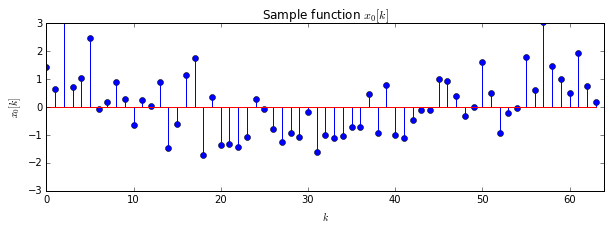

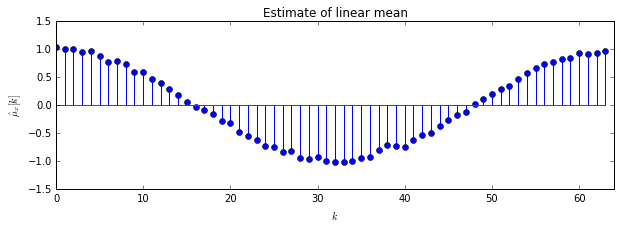

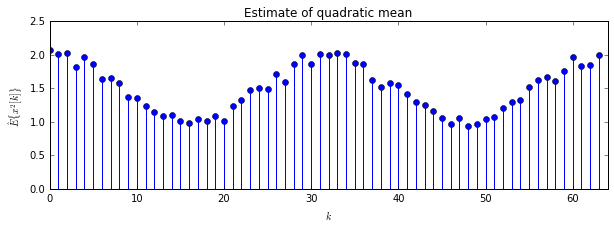

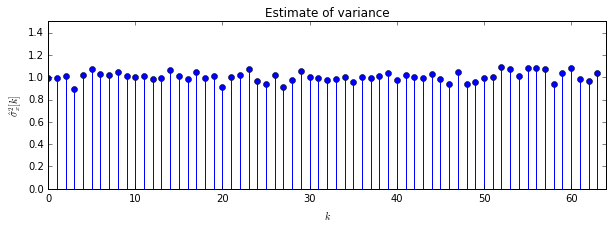

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

K = 64  # number of random samples
N = 1000  # number of sample functions


# generate the sample functions
np.random.seed(5)
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

# estimate the linear mean as ensemble average
mu = 1/N * np.sum(x, 0)
# estimate the quadratic mean
qu = 1/N * np.sum(x**2, 0)
# estimate the variance
sigma = 1/N * np.sum((x-mu)**2, 0)


# plot results
plt.rc('figure', figsize=(10, 3))

plt.figure()
plt.stem(x[0, :])
plt.title(r'Sample function $x_0[k]$')
plt.xlabel(r'$k$')
plt.ylabel(r'$x_0[k]$')
plt.axis([0, K, -3, 3])

plt.figure()
plt.stem(mu)
plt.title(r'Estimate of linear mean')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{\mu}_x[k]$')
plt.axis([0, K, -1.5, 1.5])

plt.figure()
plt.stem(qu)
plt.title(r'Estimate of quadratic mean')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{E}\{x^2[k]\}$')
plt.axis([0, K, 0, 2.5])

plt.figure()
plt.stem(sigma)
plt.title(r'Estimate of variance')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{\sigma}^2_x[k]$')
plt.axis([0, K, 0, 1.5]);

**Exercise**

* What does the linear and quadratic mean, and the variance tell you about the average behavior of the sample functions?
* Change the number `N` of sample functions and rerun the example. What influence has a decrease/increase of the sample functions on the estimated ensemble averages?

Inspection of the estimated linear mean reveals that in average the sample functions follow a cosine function with respect to the sample index $k$. The variance shows that the amount of which the samples for one particular time-instant $k$ of the sample functions are spread around the linear mean is constant. The estimate of the quadratic mean is given as $\hat{E}\{ x^2[k] \} = \hat{\mu}_x^2[k] + \hat{\sigma}_x^2[k]$. The higher the number $N$ of sample functions used for the estimate of the ensemble averages, the lower the uncertainty in comparison to the true values becomes. 

### Second-Order Ensemble Averages

#### Definition

The second-order ensemble average of two continuous-amplitude real-valued random signals $x[k]$ and $y[k]$ is defined as

\begin{equation}
E\{ f(x[k_x], y[k_y]) \} := \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k_x], y_n[k_y])
\end{equation}

It can be given in terms of the bivariate PDF as

\begin{equation}
E\{ f(x[k_x], y[k_y]) \} = \iint\limits_{-\infty}^{\infty} f(\theta_x, \theta_y) \, p_{xy}(\theta_x, \theta_y, k_x, k_y) \, \mathrm{d}\theta_x\, \mathrm{d}\theta_y
\end{equation}

By setting $y[k] = x[k]$, the second-order ensemble average can also be used to characterize the average properties of the sample functions at two different time-instants $k_x$ and $k_y$.

The definition of the second-order ensemble average can be extended straightforward to the case of more than two random variables. The resulting ensemble average is termed as higher-order ensemble average.

The choice of the mapping function $f(\cdot)$ determines the particular property of the random process which is characterized by the ensemble average. The case of a linear mapping is discussed in the following.

#### Cross-correlation function

The [cross-correlation function](https://en.wikipedia.org/wiki/Cross-correlation) (CCF) of two random signals $x[k]$ and $y[k]$ is defined as the second-order ensemble average for a linear mapping $f(x[k_x], y[k_y]) = x[k_x] \cdot y[k_y]$

\begin{equation}
\varphi_{xy}[k_x, k_y] = E\{ x[k_x] \cdot y[k_y] \}
\end{equation}

It characterizes the statistical dependencies of two random signals $x[k]$ and $y[k]$ at two different time instants $k_x$ and $k_y$.

#### Auto-correlation function

The [auto-correlation function](https://en.wikipedia.org/wiki/Autocorrelation) (ACF) of a random signal $x[k]$ is defined as the second-order ensemble average for a linear mapping $f(x[k_x], y[k_y]) = x[k_1] \cdot x[k_2]$

\begin{equation}
\varphi_{xx}[k_1, k_2] = E\{ x[k_1] \cdot x[k_2] \}
\end{equation}

It characterizes the average statistical dependencies between the samples of a random signal $x[k]$ at two different time instants $k_1$ and $k_2$.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016*.